  # Trend Analysis on Median Home Prices Data Using Python

In [85]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [63]:
df = pd.read_excel("C:/Users/olajo/Downloads/Median Home Prices.xlsx")

In [64]:
# first, get an overview infomation and dimemsion of the actual data 
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 12 columns):
Unnamed: 0           163 non-null int64
Metropolitan Area    163 non-null object
State(s)             163 non-null object
Region               163 non-null object
2004                 149 non-null float64
2005                 149 non-null float64
2006                 149 non-null float64
2007                 149 non-null float64
2008                 154 non-null float64
2009                 153 non-null float64
2010                 158 non-null float64
2011                 154 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 15.4+ KB


(163, 12)

From this quick overview, the data contain 163 entries with 12 variables, which includes 9 numeric variables and 3 categorical varaibles. Also , it is seen that some data values are missing. 

Further, There are a lot of missing values in variable years of 2004-2011, missing values in a data could distort intented analysis. Since the missing values a lot, dropping the values wont be the best option so as not to loose valuable information. Therefore, treating missing values with imputation by mean or median will be employ after further exploration. 

In [65]:
# First, select variables needed for this analysis
df = df.iloc[:,3:]

# list the selected column names
df.columns.tolist()

['Region', 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

In [66]:
# get the summary statistics of the new dataframe
df.describe(include ="all")

,Region,2004,2005,2006,2007,2008,2009,2010,2011
count,163,149.000000,149.000000,149.000000,149.000000,154.000000,153.000000,158.000000,154.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Southeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,183.796644,206.902685,215.265101,217.318792,196.155195,178.443791,179.451266,171.729870
std,NaN,111.878817,128.410024,133.216164,135.844739,106.485832,90.203337,95.621464,92.641249
min,NaN,72.700000,77.100000,81.500000,78.900000,71.700000,66.500000,67.200000,53.800000
25%,NaN,116.900000,129.800000,133.800000,134.500000,130.050000,124.600000,124.175000,119.725000
50%,NaN,143.300000,156.400000,165.100000,164.600000,155.700000,147.000000,146.000000,142.300000
75%,NaN,200.800000,244.900000,249.500000,252.100000,226.125000,203.500000,199.450000,184.925000


Regardless of the missing values, the above summary statistic shows that, year "2007" has higher mean of the   "median home price" compared to other years while year 2011 has the lowest mean. Looking at the median values across the years, median prices of home in 2006 is higher than other years but slightly different from that of 2007.

In [68]:
# calculate range of each year
for i in df.iloc[:,1:]:
    range_per_year = df[i].max() - df[i].min()
    print("The range for the year ",i, " is ", range_per_year)

The range for the year  2004  is  625.8
The range for the year  2005  is  667.4
The range for the year  2006  is  693.5
The range for the year  2007  is  757.9
The range for the year  2008  is  596.3
The range for the year  2009  is  529.7
The range for the year  2010  is  540.4
The range for the year  2011  is  543.2


The range values here, shows the difference between the largest and smallest median home prices in the data. The range represents the interval that contains all the data values for the median home process to understand the amount of dispersion in the data. According to the results the data show A large range values, which indicates greater dispersion in the data.

##### Restruction the data for further Analysis

In [10]:
# collate data into a long format. Gather years into a single column called "year" and show the corresponding values 
df_long = df.melt(id_vars = ["Region"], var_name= "Year")

In [93]:
df_long.describe(include = "all")

,Region,Year,value
count,1304,1304.0,1215.000000
unique,4,8.0,NaN
top,Southeast,2011.0,NaN
freq,424,163.0,NaN
mean,NaN,NaN,193.398107
std,NaN,NaN,113.745144
min,NaN,NaN,53.800000
25%,NaN,NaN,125.300000
50%,NaN,NaN,152.000000
75%,NaN,NaN,217.850000


#### Treat The Missing Values
Using Imputation by median. The median value of each distinct region across the  years 

In [13]:
# view sum of missing values of each variable
df_long.isnull().sum()

Region     0
Year       0
value     89
dtype: int64

In [28]:
# compute median value for each region
df_long.groupby("Region", as_index =False).median().T

,0,1,2,3
Region,Central,Northeast,Southeast,West
value,127.7,224.4,144.4,231


In [36]:
# replace the missing values with the coressopnding regional value
df_long.loc[(df_long.value.isnull()) & (df_long.Region == "Central"), "value"]= 127.7
df_long.loc[(df_long.value.isnull()) & (df_long.Region == "Northeast"), "value"]= 224.4
df_long.loc[(df_long.value.isnull()) & (df_long.Region == "Southeast"), "value"]= 144.4
df_long.loc[(df_long.value.isnull()) & (df_long.Region == "West"), "value"]= 231


In [37]:
# cross-check to see whether there are still missing values
df_long.isnull().sum()

Region    0
Year      0
value     0
dtype: int64

In [39]:
# group by region  and aggregrate by the mean, median and range 
group_region = df_long.groupby(["Year", "Region"]).agg({"value": {
                                                          "mean_price":"mean",
                                                          "median_price":"median",
                                                          "range":lambda x: max(x)-min(x)}
                                                         })

In [40]:
group_region

value                    
                mean_price median_price  range
Year Region                                   
2004 Central    129.053333       124.20  164.6
     Northeast  226.077500       220.70  368.6
     Southeast  142.649057       139.80  192.9
     West       291.584000       231.00  570.0
2005 Central    135.615556       129.60  182.1
     Northeast  253.035000       245.00  418.1
     Southeast  162.226415       144.40  265.4
     West       332.848000       247.10  610.6
2006 Central    136.102222       131.50  192.0
     Northeast  259.530000       245.95  452.6
     Southeast  170.520755       149.10  258.5
     West       353.836000       268.20  638.5
2007 Central    136.504444       130.00  197.7
     Northeast  261.822500       250.55  458.7
     Southeast  170.177358       152.50  247.1
     West       362.412000       257.40  680.3
2008 Central    130.122222       127.70  173.9
     Northeast  247.710000       239.60  406.6
     Southeast  158.824528       145.30  167.8
     West       298.768000       220.50  514.7
2009 Central    125.204444       125.80  145.8
     Northeast  226.225000       218.10  349.9
     Southeast  144.981132       141.40  127.8
     West       260.880000       189.80  459.2
2010 Central    127.168889       124.00  150.5
     Northeast  228.740000       220.65  349.7
     Southeast  143.267925       140.90  129.8
     West       266.928000       195.50  471.4
2011 Central    123.811111       122.30  159.4
     Northeast  219.562500       209.85  353.8
     Southeast  136.241509       134.60  116.1
     West       255.640000       187.20  481.6

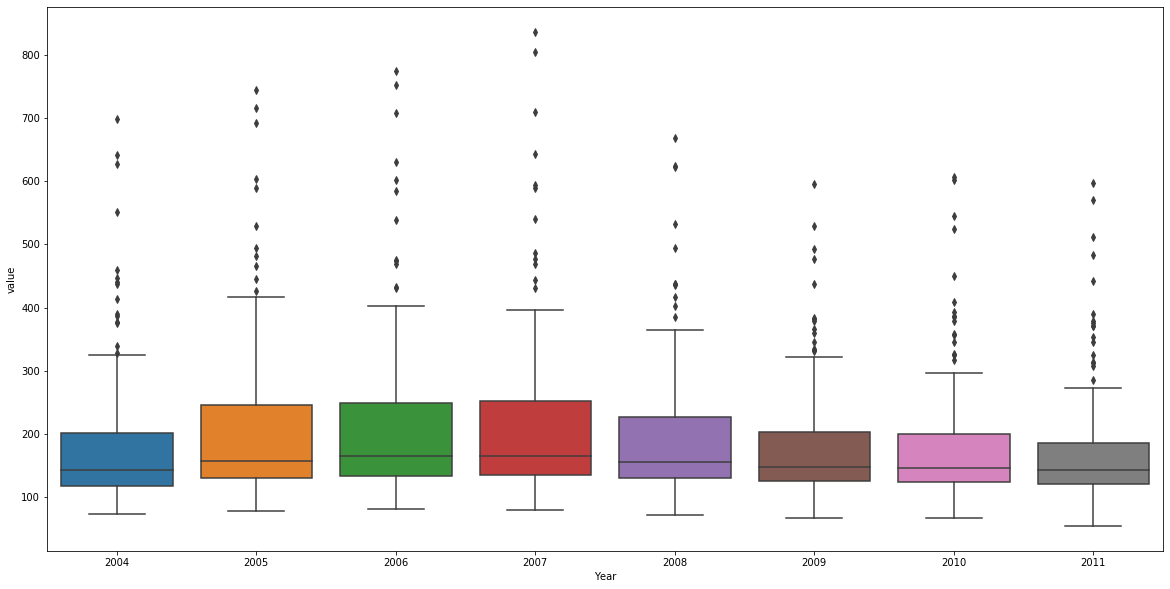

In [11]:
# visual distribution of data across the years using a boxplot 
plt.figure(figsize = (20,10))
sns.boxplot(x = "Year", y = "value", data = df_long);

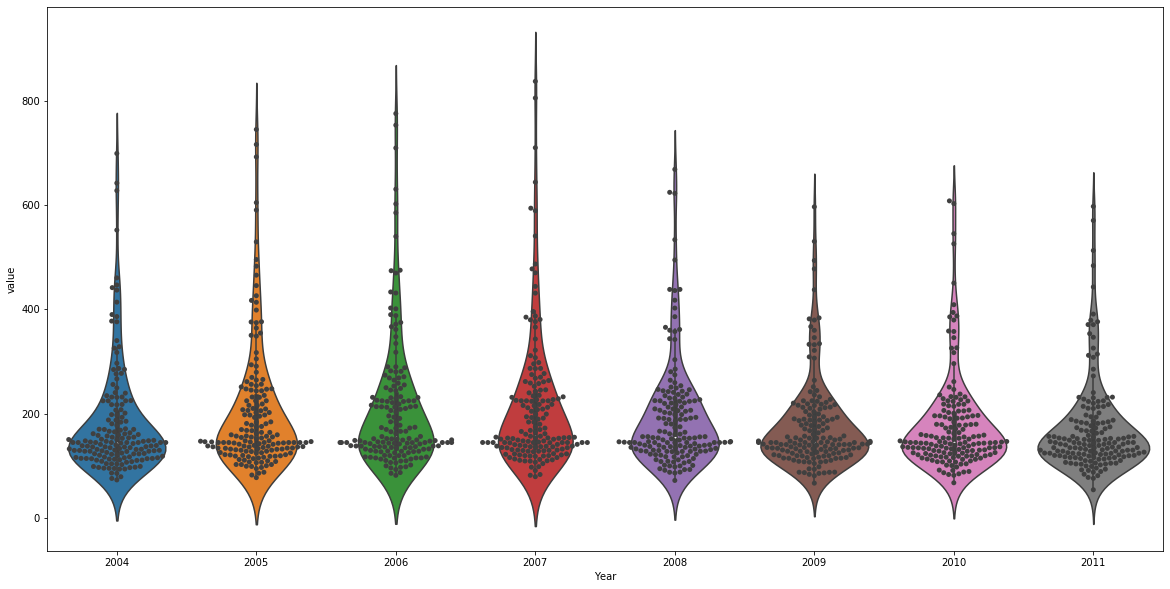

In [44]:
#view the distribution of the data points using voilinplot
plt.figure(figsize = (20,10))
sns.violinplot(x = "Year", y = "value", data = df_long)
sns.swarmplot(x = "Year", y = "value", data = df_long, color = ".25");

The boxplot and voilinplot above shows the distribution of median home prices by the years in the data. The charts shows little to no significant variation slight variation in the median values across the year and lots of outliers.

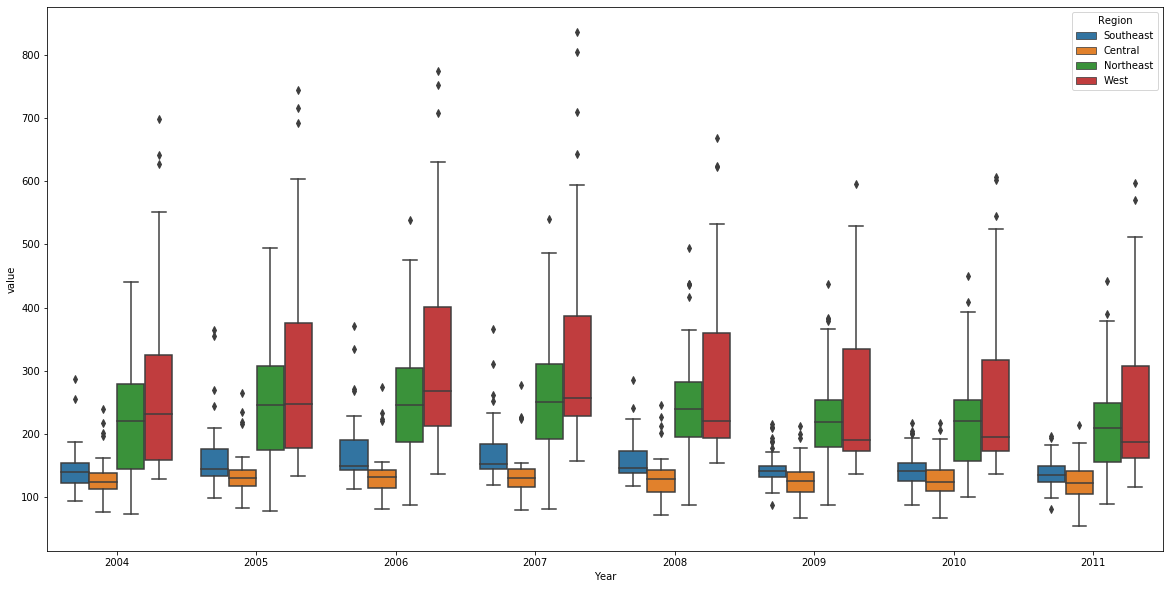

In [42]:
# view distribution of median home prices over the period 2004-2011 by the distinct regions
plt.figure(figsize = (20,10))
sns.boxplot(x = "Year", y = "value", hue = "Region", data = df_long);

The group boxplot above shows an explicit distribution of median home prices of the four regions by year. From the plot above, the west region of the median home prices is consistently greater than the median home prices of other regions across all years. Furthermore, there is also a consistent trend regionally across the years with Central region always having the lowest median home price while the West region is attributed to having the highest median home prices. Grouping the four regions, central and southeast regions show a similar trend; thus, this chart shows a significant variation among regions. 

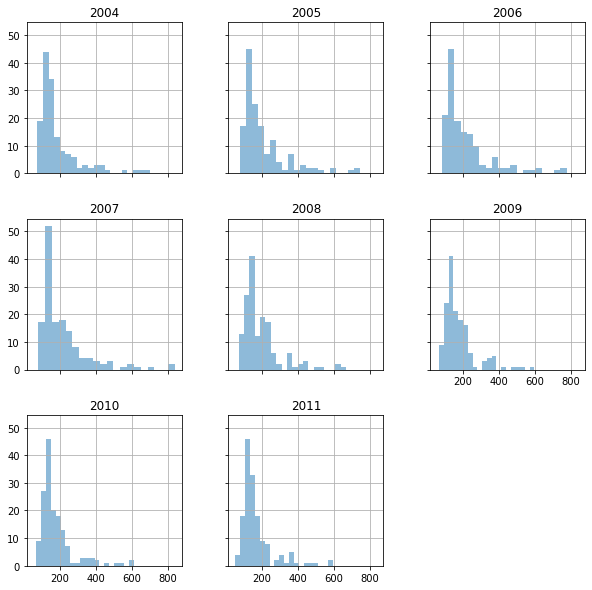

In [75]:
df_no_region =  df.iloc[:,1:]
df_no_region.hist(alpha=0.5, bins=20, sharex = True, sharey = True, figsize = (10,10));

### Trend Analysis

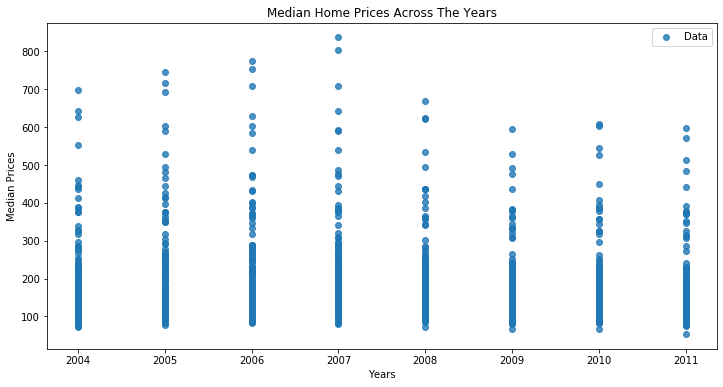

In [59]:
# visualize relationship between Median home Price and by each year
plt.figure(figsize=(12, 6))
plt.scatter(df_long.Year, df_long.value, alpha = 0.8, label='Data') 
plt.title("Median Home Prices Across The Years") 
plt.xlabel('Years') 
plt.ylabel('Median Prices') 
plt.legend()
plt.show()

The chart above shows no visible trend in the data, shows a slight variation in median home prices across the years.

In [56]:
# Initialise and fit linear regression model using Statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
model = smf.ols(formula='value ~ Region', data=df_long).fit()

In [58]:
model.params

Intercept              130.447778
Region[T.Northeast]    109.890035
Region[T.Southeast]     23.163307
Region[T.West]         172.414222
dtype: float64

The resulting model paramaters above shows the intercept distribution of the four regions and the coeffecient coresponding to each of the regions. 

In [92]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     210.1
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          4.32e-111
Time:                        16:47:58   Log-Likelihood:                -7727.3
No. Observations:                1304   AIC:                         1.546e+04
Df Residuals:                    1300   BIC:                         1.548e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             130.4478    

With Rsquared of 0.327, this simply means the model only explains 33% of the data, which is not good enough. However  with the coressponding fstatistic and and a very small pvalue under 5% signifance level sugguests the regression is significant. Further, it shows the intercept and coefficients of each region  are statistically significant with the corresponsding Pvalue at Zero

### ANOVA Analysis

In [93]:
import statsmodels.api as sm
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Region,3.0,5.194062e+06,1.731354e+06,210.07461,4.315031e-111
Residual,1300.0,1.071410e+07,8.241614e+03,NaN,NaN


 Finally, The result of the anova analysis confirms that the mean meadian home prices vary among.

### Conclusion

Looking closely to the table above, the F ratio is significantly high and a large F ratio means that the variation among group means is more than you'd expect to see by chance. Recall, the Northeast and West regions show similarities while Central and Southeast have a lot in common; consequently, the F ratio further explains the large variation existing between the two groups. Furthermore, the p-value buttresses the fact that there is a significant difference between the two groups. Thus, we can safely conclude that the median home price for the west and northeast regions are higher than the median home price of both central and south east.